In [1]:
import os
import shutil
from tqdm.notebook import tqdm as tqdm
from PIL import ImageFont, ImageDraw, Image
from IPython.display import display
from IPython.display import Image as im
import numpy as np
import matplotlib.pyplot as plt
import ipyplot
import cv2
%matplotlib inline

In [2]:
imageName="GoundTruthRGB.jpg"
imagePath=r"C:\\Users\\dsi224\\Documents\\PythonFiles\\PythonCodesForDiffusionModel"  #Use r with \\
imageFullName=os.path.join(imagePath, imageName)
print(imageFullName)
image = cv2.imread(imageFullName, cv2.IMREAD_COLOR)

C:\\Users\\dsi224\\Documents\\PythonFiles\\PythonCodesForDiffusionModel\GoundTruthRGB.jpg


Image type <class 'numpy.ndarray'>
Ground Truth image shape: (2048, 2048, 3)


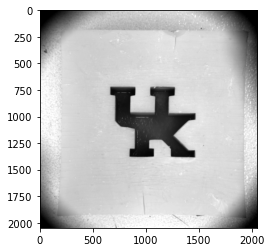

In [3]:
print('Image type',type(image))
imageShape=image.shape
print('Ground Truth image shape:',imageShape)
plt.imshow(image)
plt.show()

Test Shape: (2048, 1024, 3) Train Shape: (2048, 1024, 3)


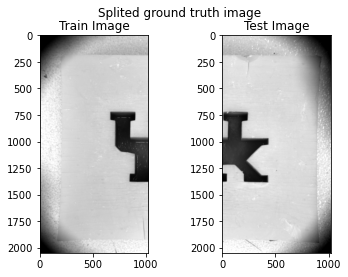

In [4]:
#imageDelta=9;
imageTrain=image[:,:int(imageShape[1]/2),:]
imageTest=image[:,int(imageShape[1]/2):,:]
print('Test Shape:',imageTest.shape, 'Train Shape:',imageTrain.shape)
fig, axs = plt.subplots(nrows=1,ncols=2)
axs[0].imshow(cv2.cvtColor(imageTrain, cv2.COLOR_BGR2RGB))
axs[0].set_title('Train Image')
axs[1].imshow(cv2.cvtColor(imageTest, cv2.COLOR_BGR2RGB))
axs[1].set_title('Test Image')
fig.suptitle('Splited ground truth image')
plt.show()

In [5]:
# Creating a directory
directoryName_1='Dir_'
directoryName_2=imageName[:-4]
directoryName=directoryName_1+directoryName_2
print(directoryName)
directoryFullName=os.path.join(imagePath, directoryName)
if not os.path.exists(directoryFullName):
    os.makedirs(directoryFullName)
else:
    shutil.rmtree(directoryFullName)           # Removes all the subdirectories!
    os.makedirs(directoryFullName)

Dir_GoundTruthRGB


In [6]:
# Stanford car test set is 8041
# Stanford car train set is 8144

imageTestX,imageTestY,_=imageTest.shape
imageTrainX,imageTrainY,_=imageTrain.shape
PixelsX=64
deltaX=18
PixelsY=64
deltaY=13
listTestImages = [imageTest[x:x+PixelsX,y:y+PixelsY] for x in range(0,imageTestX-PixelsX,deltaX) for y in range(0,imageTestY-PixelsY,deltaY)]
listTrainImages = [imageTrain[x:x+PixelsX,y:y+PixelsY] for x in range(0,imageTrainX-PixelsX,deltaX) for y in range(0,imageTrainY-PixelsY,deltaY)]

firstTestShape=listTestImages[0].shape; print('First test image shape',firstTestShape)
firstTrainShape=listTrainImages[0].shape; print('First train image shape',listTrainImages[0].shape)
print('Images in test set:',len(listTestImages))
print('Images in train set:',len(listTrainImages))

T=[firstTestShape==listTestImages[i].shape for i in range(len(listTestImages))]
print('All test images have same shape:',sum(T)==len(listTestImages))
T=[firstTrainShape==listTrainImages[i].shape for i in range(len(listTrainImages))]
print('All train images have same shape:',sum(T)==len(listTrainImages))
print('Length of train plus test set:',len(listTrainImages)+(len(listTestImages)))

First test image shape (64, 64, 3)
First train image shape (64, 64, 3)
Images in test set: 8214
Images in train set: 8214
All test images have same shape: True
All train images have same shape: True
Length of train plus test set: 16428


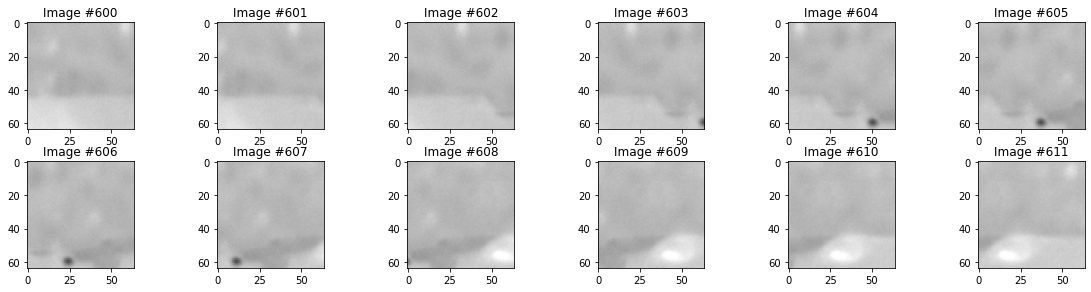

In [7]:
columnN=6
rowN=2
imageNumber=600
fig, axs = plt.subplots(nrows=rowN,ncols=columnN,figsize=(16, 4))
fig.tight_layout()

for ii in range(rowN):
    for jj in range(columnN):
        axs[ii,jj].imshow(cv2.cvtColor(listTestImages[imageNumber], cv2.COLOR_BGR2RGB))
        axs[ii,jj].set_title('Image #'+str(imageNumber))
        imageNumber+=1
plt.show() 

In [8]:
np.random.seed(seed=42)
permList=np.random.permutation(len(listTrainImages))
print(permList[0])
testImage=[listTestImages[i] for i in permList]
trainImage=[listTrainImages[i] for i in permList]
print(np.all(testImage[0]==listTestImages[3608]))

# Stanford car test set is 8041
# Stanford car train set is 8144
test=testImage[:8041]
train=trainImage[:8144]

3608
True


In [34]:
# Creating a directories
directoryName_1='Dir_'
directoryName_2=imageName[:-4]
directoryName=directoryName_1+directoryName_2
print(directoryName)
directoryFullName=os.path.join(imagePath, directoryName)
if not os.path.exists(directoryFullName):
    os.makedirs(directoryFullName)
else:
    shutil.rmtree(directoryFullName)           # Removes all the subdirectories!
    os.makedirs(directoryFullName)
testDirectory=os.path.join(directoryFullName, 'cars_test')
trainDirectory=os.path.join(directoryFullName, 'cars_train')
os.makedirs(testDirectory)
os.makedirs(trainDirectory)

Dir_C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel\Dir_GoundTruthRGBForDDPM_Test\x_01984_y_00000


OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'C:\\\\Users\\\\dsi224\\\\Documents\\\\PythonFiles\\\\PythonCodesForDiffusionModel\\Dir_C:'

In [10]:
imageType='.jpg'

# Test
for ii in range(len(test)):
    namePrefix='{:05}'.format(ii+1)
    imageName=os.path.join(testDirectory, (namePrefix+imageType))
    cv2.imwrite(imageName, test[ii])
    
# Test
for ii in range(len(train)):
    namePrefix='{:05}'.format(ii+1)
    imageName=os.path.join(trainDirectory, (namePrefix+imageType))
    cv2.imwrite(imageName, train[ii])

In [33]:
# Creating a directory
directoryName_1='Dir_'
directoryName_2=imageName[:-4]+'ForDDPM_Test'
directoryName=directoryName_1+directoryName_2
print(directoryName)
directoryFullName=os.path.join(imagePath, directoryName)
if not os.path.exists(directoryFullName):
    os.makedirs(directoryFullName)
else:
    shutil.rmtree(directoryFullName)           # Removes all the subdirectories!
    os.makedirs(directoryFullName)

Dir_C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel\Dir_GoundTruthRGBForDDPM_Test\x_01984_y_00000ForDDPM_Test


OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'C:\\\\Users\\\\dsi224\\\\Documents\\\\PythonFiles\\\\PythonCodesForDiffusionModel\\Dir_C:'

In [23]:
imageTestX,imageTestY,_=imageTest.shape
imageType='.jpg'

PixelsX=64
deltaX=64
PixelsY=64
deltaY=64

testImages=[]
testImageNames=[]

for x in range(0,imageTestX,deltaX):
    for y in range(0,imageTestY,deltaY):
        smallImage=imageTest[x:x+PixelsX,y:y+PixelsY]
        testImages.append(smallImage)
        smallImageName='x_'+'{:05}'.format(x)+'_y_'+'{:05}'.format(y)
        print(x,y)
        if y==0:
            break


0 0
64 0
128 0
192 0
256 0
320 0
384 0
448 0
512 0
576 0
640 0
704 0
768 0
832 0
896 0
960 0
1024 0
1088 0
1152 0
1216 0
1280 0
1344 0
1408 0
1472 0
1536 0
1600 0
1664 0
1728 0
1792 0
1856 0
1920 0
1984 0


In [18]:
print(smallImageName)

x_01984_y_00000


In [20]:
print(imageTestY)

1024


In [32]:
imageType='.jpg'
CWD=r"C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel"
directoryPath=os.path.join(CWD, directoryName)
imageName=os.path.join(directoryPath, (smallImageName+imageType))
print(imageName)
cv2.imwrite(imageName, smallImage)

C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel\Dir_GoundTruthRGBForDDPM_Test\x_01984_y_00000.jpg


True